## Homework 4: Fourier Analysis

##### [Fourier (notebook version)](/PDE/weave/homework04/Fourier.ipynb)


## Due date: 

### Student Name:

**Exercise 1.**

a.- Find the Fourier series of the function $f(x) := x$ in the
interval $[-\pi,\pi]$.

b.- Use Parseval's relation to prove that 

$$
  \sum_{n=1}^{\infty} \frac{1}{n^2} = \pi^2/6
$$




**Exercise 2.**

a.- Find the Fourier series of the function $f(x):= e^{sx}$ in the
interval $[-\pi, \pi]$.

b.- Use Parseval's relation to prove that 

$$
  \pi \coth(\pi s)/s = \sum_{n=-\infty}^{\infty} \frac{1}{s^2+n^2}
$$




**Exercise 3.**

Let $S_n: L^2 \to L^2$ be the map that sends $f \in L^2$ to the partial
Fourier series,

$$
  S_n(f) := \sum_{m=-n}^{n} c_m e^{imx}, \;\;\;\;\;\;\; 
                 c_m:= \frac{1}{2\pi}\langle e^{imx},f(x) \rangle.
$$

Show that the $S_n$ are orthogonal projections and that 
$S_n S_m = S_m S_n = S_m$ if $m \leq n$.



**Exercise 4. Use of the Fourier Interpolation**

Compute the Fourier Interpolation of the functions: $|x|$, $\mathrm{sign}(x)$, and $\sin(x)+ 3\cos(x)$ and  $e^{sx}$ (for $s= 1, 3, 3i$) and plot it along the Fourier series coefficients. Below is an example:

In [ ]:
using Pkg
Pkg.activate("../../PDE2025")
Pkg.instantiate()
using FFTW
using Plots

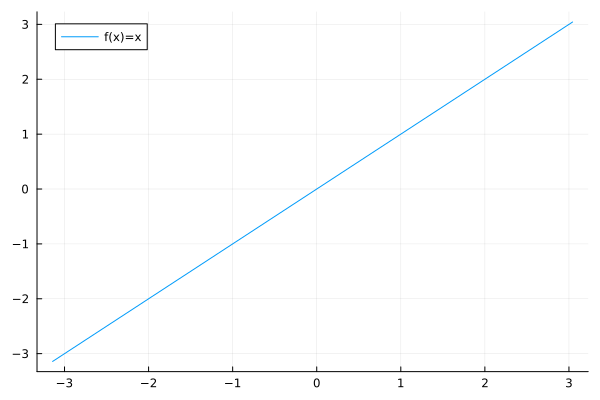

In [46]:
N = 64
f(x) = x
#f(x) = x*sign(x)
#f(x) = exp(2*x)
xi = -π
xf = π
xv = [xi + (xf-xi)*(i-1)/N for i in 1:N]
fv = f.(xv)
plot(xv,fv, label="f(x)=x")

The Fourier coefficients of $f(x)=x$ in the interval $[-π,π]$ are $b_n=i/n$, $n\neq 0$, $b_0 = 0$. While the Fourier Interpolant is: $i_n = 1/(e^{-i2πn}-1)$. 

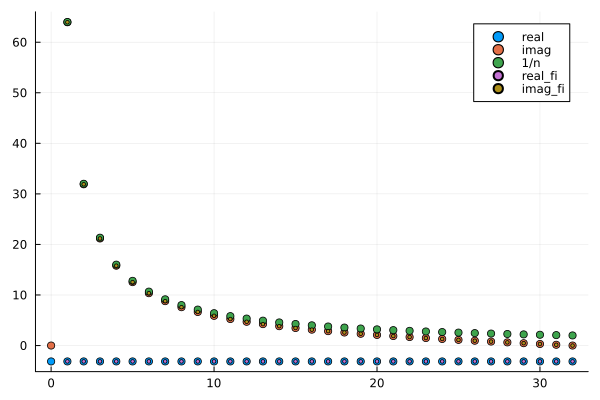

In [47]:
freq = fftshift(rfftfreq(N))*N
rft = rfft(fv)
#fftf = fft(fv)
bn = N ./freq  #for f(x)=x
an = 1 ./ (freq.^2)/N/π*2 #for f(x)=x*sign(x)
in = 2*π ./( exp.(-im*2*π*freq/N) .- 1)
scatter(freq,real.(rft), label="real", markersize=4)
scatter!(freq,imag.(rft), label="imag")
scatter!(freq,bn, label = "1/n" )
#scatter!(freq,an, label="2N/π/n^2")
scatter!(freq,real.(in), label="real_fi", markersize=2)
scatter!(freq,imag.(in), label="imag_fi", markersize=2)

### For future use we construct an Fourier interpolant for functions in [0,2π]

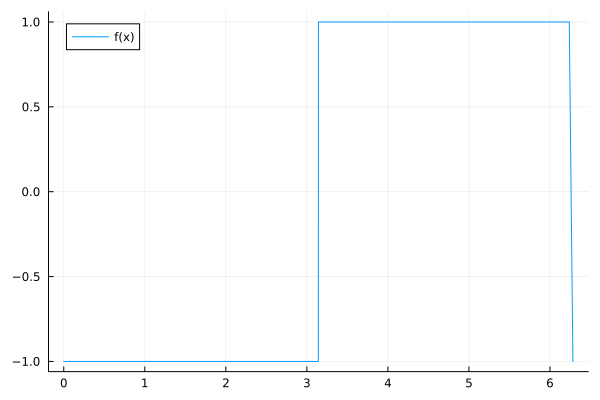

In [178]:
f(x) = sign(mod(x,2π)-π) #it works fine with this, except at zero (because of periodicity issues)
#f(x) = -(x*(1-sign(x-π)) + (x-2π)*(sign(x-π)+1)) /2/π #it does not work with this.
#f(x) = sin(x) + sin(3*x)/3 + sin(5*x)/5 #it works fine with this.
plot(f, 0, 2π, label="f(x)")


In [ ]:
"""
    fourier_interpolant(f::Vector, T=2π)

Compute the Fourier interpolant `P(x)` of a periodic signal sampled uniformly over [0, T).

# Arguments
- `f`: Vector of function values `[f₁, f₂, ..., f_N]` sampled at `xₙ = (n-1) * T/N`.
- `T`: Period of the signal (default: `2π`).

# Returns
- A function `P(x)` that evaluates the Fourier interpolant at any `x`.
"""
function fourier_interpolant(f::Vector, T=2π)
    N = length(f)
    Δx = T / N
    
    # Compute normalized DFT coefficients
    F = fft(f) / N
    
    # Frequencies in FFT order (0, 1, ..., N/2, -N/2+1, ..., -1)
    k = fftfreq(N) * N  # Integer frequencies
    
    # Precompute coefficients for the interpolant
    function P(x)
        # Map x to [0, T) for periodicity
        x_mod = mod(x, T)
        # Sum over all frequency components
        sum(F[m+1] * exp(2π * im * k[m+1] * x_mod / T) for m in 0:N-1) |> real
    end
    
    return P
end
nothing

fourier_interpolant

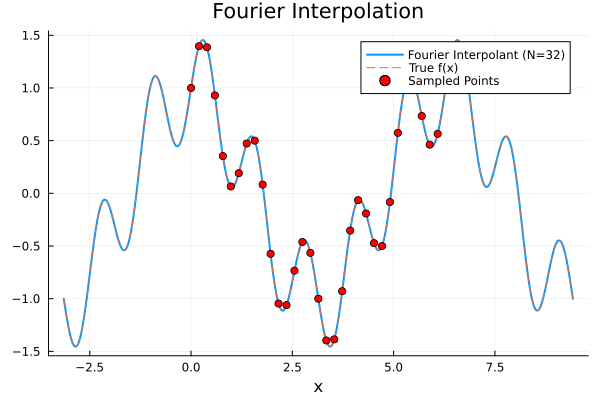

In [172]:
N = 32
T = 2π
ff(x) = cos(x) + 0.5*sin.(5*x)
x_sampled = range(0, 2π, length=N+1)[1:N]  # Sample over [0, 2π)
f_sampled = ff.(x_sampled)  # Sampled function values

P = fourier_interpolant(f_sampled, T)
x_eval = range(-π, 3π, length=1000)  # Test periodicity
P_eval = P.(x_eval)

plot(x_eval, P_eval, label="Fourier Interpolant (N=$N)", linewidth=2)
plot!(x_eval, ff.(x_eval), label="True f(x)", linestyle=:dash)
scatter!(x_sampled, f_sampled, label="Sampled Points", color=:red)
title!("Fourier Interpolation")
xlabel!("x")

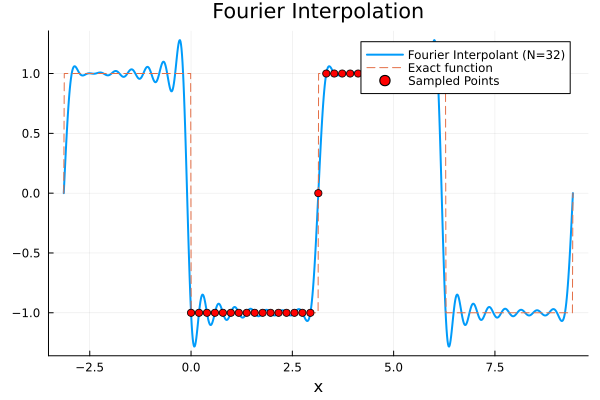

In [ ]:
f_sampled = f.(x_sampled)
P = fourier_interpolant(f_sampled, T)
P_eval = P.(x_eval)

plot(x_eval, P_eval, label="Fourier Interpolant (N=$N)", linewidth=2)
plot!(x_eval, f.(x_eval), label="Exact function", linestyle=:dash)
scatter!(x_sampled, f_sampled, label="Sampled Points", color=:red)
title!("Fourier Interpolation")
xlabel!("x")

**Exercise 5. Use of the Fourier Interpolation**

Play around and interpolate different functions with the tool just introduced.



### The Fourier Interpolant of a delta function.

We approximate a delta function distribution by a sequence of continuous functions;

$$
f(x,x_0,n) = \left(\begin{align}
                 (x-x_0-1/n*n &\;\; x \in [x_0-1/n,x_0] \nonumber\\
                 (x_0+1/n-x)*n &\;\; x \in [x_0,x_0+1/n] \nonumber\\
                 0 &\;\; x \notin [x_0-1/n,x_0+1/n] \nonumber
                 \end{align}
                 \right.
$$



In [39]:
function f_n(x,x0,n)
    if x > x0 - 1/n && x <= x0
        return (x-x0+1/n)*n^2
    elseif x > x0 && x < x0 + 1/n
        return -(x-x0-1/n)*n^2
    else
        return 0
    end
end

f_n (generic function with 1 method)

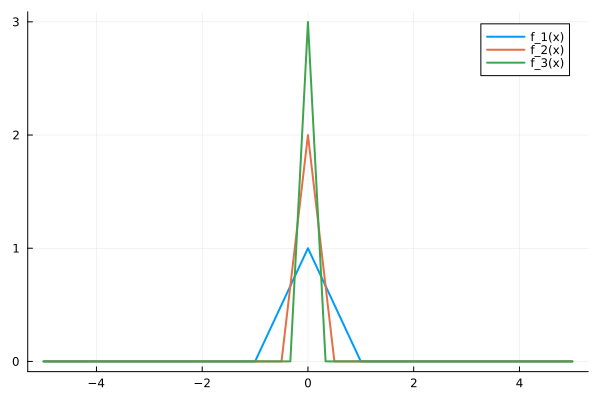

In [71]:
x0 = 0.0
f1(x) = f_n(x,x0,1)
f2(x) = f_n(x,x0,2)
f3(x) = f_n(x,x0,3)
f6(x) = f_n(x,x0,6)
f9(x) = f_n(x,x0,9)
f18(x) = f_n(x,x0,18)
plot(f1, label="f_1(x)", linewidth=2)
plot!(f2, label="f_2(x)", linewidth=2)
plot!(f3, label="f_3(x)", linewidth=2)

The real parts get higher and higher frequency components. 

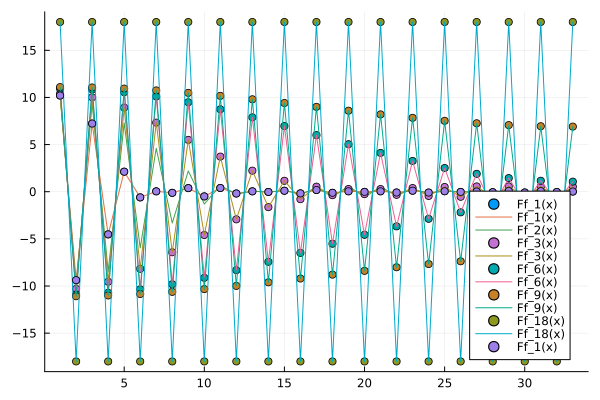

In [72]:
scatter(real.(rfft(f1.(xv))), label="Ff_1(x)")
plot!(real.(rfft(f1.(xv))), label="Ff_1(x)")
#scatter!(real.(rfft(f2.(xv))), label="Ff_2(x)")
plot!(real.(rfft(f2.(xv))), label="Ff_2(x)")
scatter!(real.(rfft(f3.(xv))), label="Ff_3(x)")  
plot!(real.(rfft(f3.(xv))), label="Ff_3(x)")
scatter!(real.(rfft(f6.(xv))), label="Ff_6(x)")
plot!(real.(rfft(f6.(xv))), label="Ff_6(x)")
scatter!(real.(rfft(f9.(xv))), label="Ff_9(x)")
plot!(real.(rfft(f9.(xv))), label="Ff_9(x)")
scatter!(real.(rfft(f18.(xv))), label="Ff_18(x)")
plot!(real.(rfft(f18.(xv))), label="Ff_18(x)")
scatter!(real.(rfft(f1.(xv))), label="Ff_1(x)")

The imaginary parts are all very small.

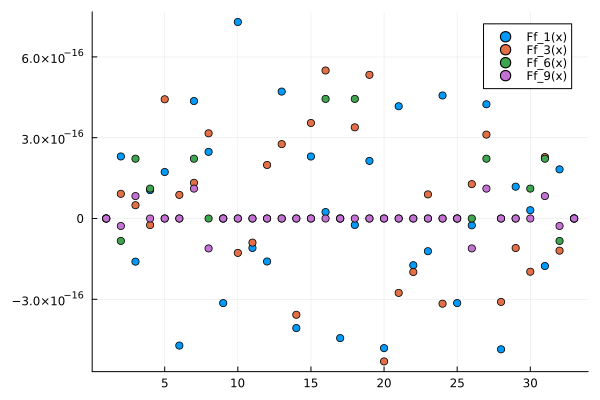

In [73]:
scatter(imag.(rfft(f1.(xv))), label="Ff_1(x)")
#scatter!(imag.(rfft(f2.(xv))), label="Ff_2(x)")    
scatter!(imag.(rfft(f3.(xv))), label="Ff_3(x)")
scatter!(imag.(rfft(f6.(xv))), label="Ff_6(x)")
scatter!(imag.(rfft(f9.(xv))), label="Ff_9(x)")

**Exercise 6. Interpolation of distributions**

Try to deduce what is the limiting interpolant. Not only for the case of $x_0=0$,
but in general. Then compare with the exact value for it.  